In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

In [4]:
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
X[0]

array([-1.78179743, -1.49004624])

In [6]:
y[0]

0

In [7]:
def svm(X,y,epochs,alpha):
    w = np.zeros(2)
    errors = []
    for i in range(len(X)):
        error = 0
        for epoch in range(1,epochs):
            if (y[i] * (np.dot(X[i],w))) < 1:
                w = w + alpha * ((y[i] * X[i]) + (-2 * (1/epoch) * w) )
                error = 1
#                 print(epoch,"Inside If")
            else:
                w = w + alpha * (-2 * (1/epoch) * w)
#                 print(epoch,"Inside Else")
#         print(error)
        errors.append(error)
    return errors, w

In [8]:
err, weights = svm(X,y,50000,0.0001)

In [9]:
weights

array([3.78019069, 1.73582187])

In [10]:
import matplotlib.pyplot as plt

(0.5, 1.5)

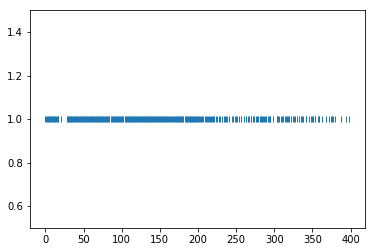

In [11]:
plt.plot(err,'|')
plt.ylim(0.5,1.5)

In [12]:
prediction = []
for i in range(len(X)):
    ypred = np.dot(X[i], weights)
    if ypred < 0.5:
        ypred = 0
    else:
        ypred = 1
    prediction.append(ypred)

In [13]:
prediction[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [14]:
y[:10].values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [15]:
accuracy_score(y, prediction)

0.83